In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from log_parser import LogParser

In [2]:
parser = LogParser()
# parser.format_lists()
df = parser.df

/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E10.N8.B3.S0.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E100.N8.B3.S0.log
/mnt/d/Code/summer_research/hybrid-vector-clocks/hvc/LOGFILES/E5.N8.B3.S0.log


In [3]:
df = df.sort_values(['physical_time']).reset_index(drop = True)
df = df.fillna(0)

In [4]:
df

,to_node,from_node,physical_time,prev_max_epoch,prev_offsets,prev_counters,new_max_epoch,new_offsets,new_counters,offset_size,counter_size,epsilon,num_nodes
0,5,6,00:00:00 000001,52,10-10-10-10-10-0-2-10,0-0-0-0-0-0-1-0,52,10-10-10-10-10-0-2-10,0-0-0-0-0-0-0-0,1,1,10,8
1,5,2,00:00:00 000001,1715,8-12-9-6-100-0-7-100,0-0-0-0-0-0-0-0,1715,8-12-9-6-100-0-7-100,0-0-0-0-0-0-0-0,5,0,100,8
2,5,2,00:00:00 000001,2025,33-30-31-30-100-0-32-100,0-0-0-0-0-0-0-0,2025,33-30-31-30-100-0-32-100,0-0-0-0-0-0-0-0,5,0,100,8
3,5,2,00:00:00 000001,3626,4-2-1-7-100-0-1-1,0-0-6-0-0-0-0-0,3632,4-2-1-7-100-0-1-1,0-0-0-0-0-1-0-0,6,1,100,8
4,4,0,00:00:00 000001,4479,0-1-0-3-100-100-4-0,0-0-0-0-0-0-0-0,4513,100-100-100-100-0-2-100-100,0-0-0-0-1-0-0-0,3,0,100,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24377,6,4,00:00:00 000216,906817,4-3-3-1-2-5-0-8,0-0-0-0-0-0-0-0,906818,4-3-3-1-2-5-0-8,0-0-0-0-0-0-1-0,7,0,100,8
24378,2,6,00:00:00 000216,907175,5-2-0-1-8-4-1-3,0-0-0-0-0-0-1-0,907191,5-2-0-1-8-4-1-3,0-0-1-0-0-0-0-0,7,1,100,8
24379,6,3,00:00:00 000216,910144,4-5-1-1-1-8-0-15,0-0-0-1-0-0-0-0,910145,4-5-1-1-1-8-0-15,0-0-0-0-0-0-1-0,7,1,100,8
24380,2,1,00:00:00 000216,910223,9-5-0-5-1-5-2-3,0-1-0-0-0-0-0-0,910232,9-5-0-5-1-5-2-3,0-0-1-0-0-0-0-0,7,1,100,8


5 epsilon


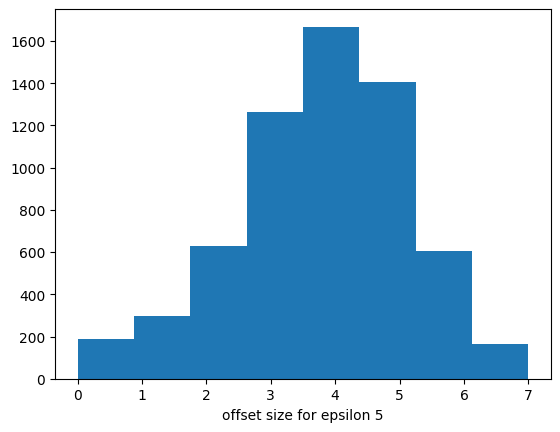

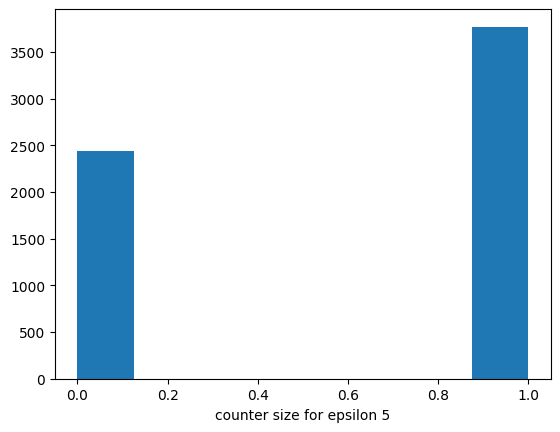

10 epsilon


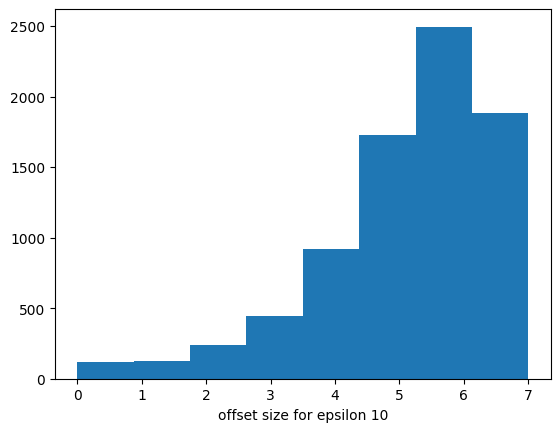

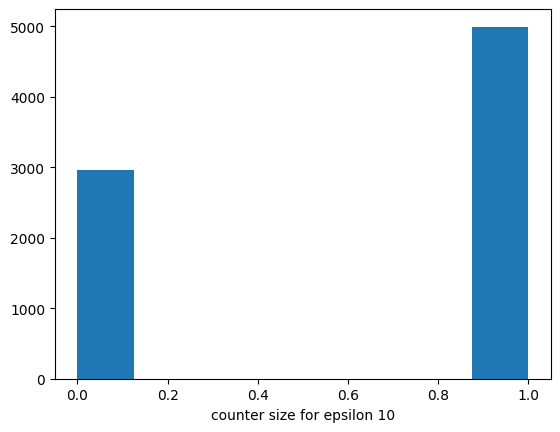

100 epsilon


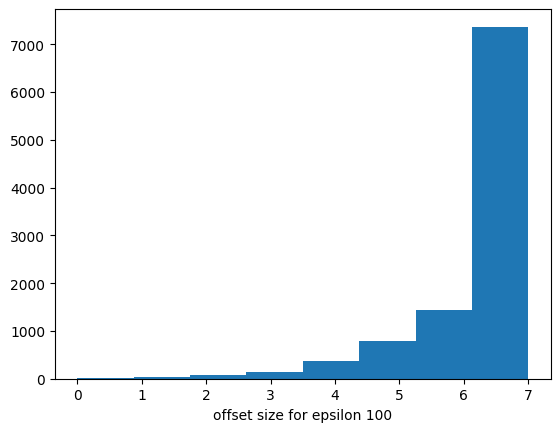

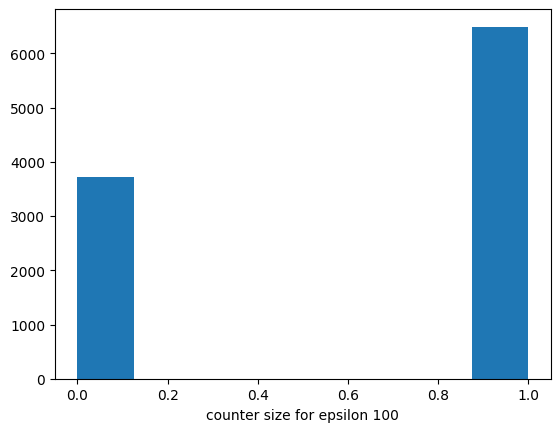

In [11]:
for epsilon in [5, 10, 100]:
    print('{} epsilon'.format(epsilon))
    plt.hist(df[df['epsilon'] == epsilon]['offset_size'], bins = 8)
    plt.xlabel('offset size for epsilon {}'.format(epsilon))
    plt.show()
    plt.hist(df[df['epsilon'] == epsilon]['counter_size'], bins = 8)
    plt.xlabel('counter size for epsilon {}'.format(epsilon))
    plt.show()
    